In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = [train,test]

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
all_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print (train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [12]:
# proves that females are rescued more than males

In [15]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


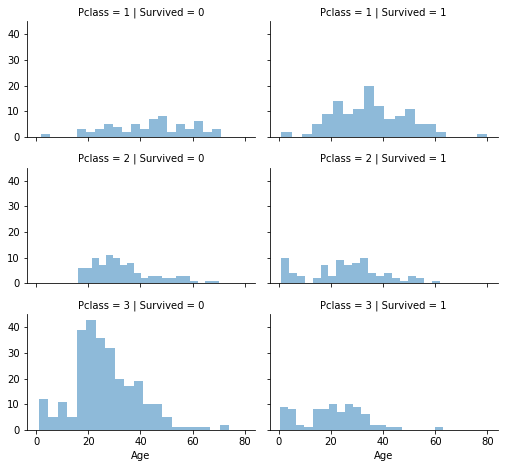

In [17]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


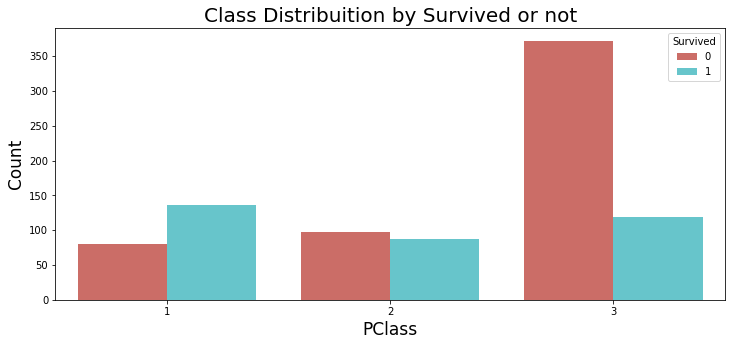

In [18]:
print(pd.crosstab(train.Survived, train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

In [19]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


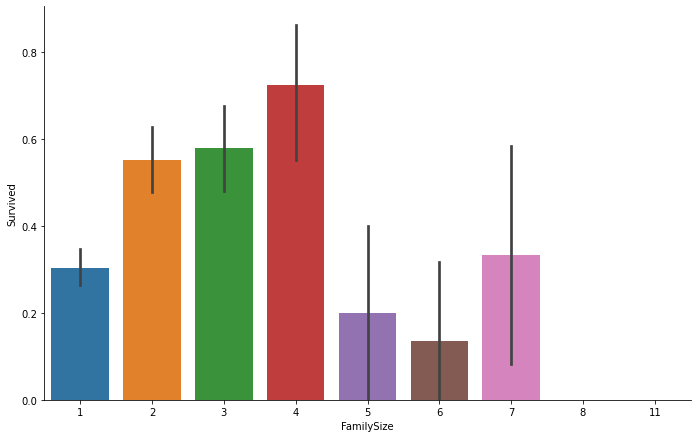

In [20]:
print(pd.crosstab(train.FamilySize, train.Survived))
sns.factorplot(x="FamilySize",y="Survived", data=train, kind="bar",size=6, aspect=1.6)
plt.show()

In [21]:
train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)
all_data = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [24]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
Ticket         891
Fare           891
Cabin          204
Embarked       889
FamilySize     891
dtype: int64

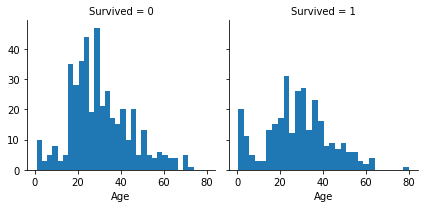

In [26]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=30)

Sex       female  male
Survived              
0             81   468
1            233   109


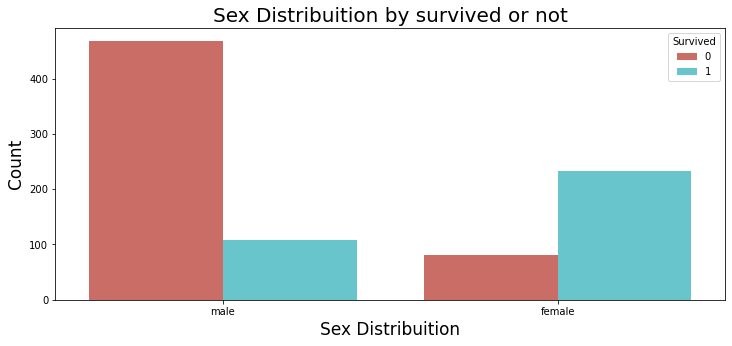

In [27]:
print(pd.crosstab(train.Survived,train.Sex))

plt.figure(figsize=(12,5))
sns.countplot(x="Sex", data=train, hue="Survived",palette="hls")
plt.title('Sex Distribuition by survived or not', fontsize=20)
plt.xlabel('Sex Distribuition',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


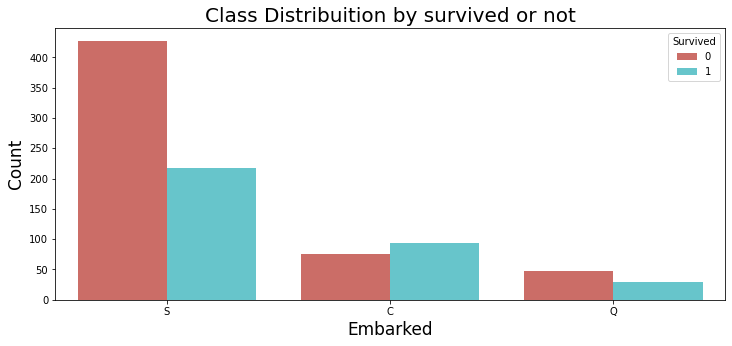

In [28]:
print(pd.crosstab(train.Survived, train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=train, hue="Survived",palette="hls")
plt.title('Class Distribuition by survived or not',fontsize=20)
plt.xlabel('Embarked',fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.show()

In [29]:
print('Shape Befor drop: ', train.shape)
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
all_data = [train, test]
print('Shape After drop: ',train.shape)

Shape Befor drop:  (891, 11)
Shape After drop:  (891, 9)


In [30]:
for dataset in all_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


In [31]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [33]:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_data.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
    
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


In [34]:
train['Age_group'] = pd.cut(train['Age'], 5)
train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

,Age_group,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [35]:
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,S,2,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,C,2,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,S,1,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,S,2,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,S,1,"(32.252, 48.168]"


In [36]:
train = train.drop(['Age_group'], axis=1)
all_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,S,1


In [37]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [38]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,0,1


In [39]:
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)
all_data = [train,test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,0,2
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,1


In [40]:
# retain the new Title feature for model training.
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [41]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


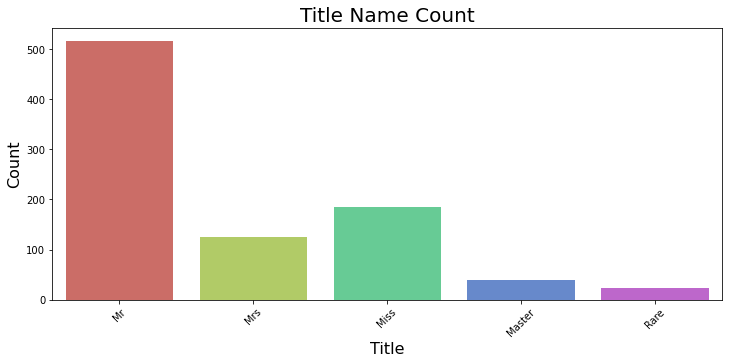

In [42]:
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [43]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,0,2,3
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0,1,1


In [44]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
all_data = [train, test]

In [45]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title
0,0,3,1,1.0,0,2,1
1,1,1,0,2.0,1,2,3
2,1,3,0,1.0,0,1,2
3,1,1,0,2.0,0,2,3
4,0,3,1,2.0,0,1,1


In [46]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,FamilySize,Title
0,892,3,1,2,2,1,1
1,893,3,0,2,0,2,3
2,894,2,1,3,2,1,1
3,895,3,1,1,0,1,1
4,896,3,0,1,0,3,3


In [62]:
#Applying ML models

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

In [63]:
random_forest= RandomForestClassifier(n_estimators=100,
                             max_features='auto',
                             criterion='entropy',
                             max_depth=10)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [51]:
#Apply GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, Y_train)
y_prediction= clf.predict(X_test)
clf.score(X_train, Y_train)
acc_clf = round(clf.score(X_train, Y_train) * 100, 2)
print(round(acc_clf,2,), "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [52]:
#Apply LGBMClassifier

from lightgbm import LGBMClassifier
model = LGBMClassifier().fit(X_train, Y_train)
y_predict= model.predict(X_test)
model.score(X_train, Y_train)
acc_model = round(model.score(X_train, Y_train) * 100, 2)
print(round(acc_model,2,), "%")

ModuleNotFoundError: No module named 'lightgbm'

In [53]:
#Apply Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [54]:
# Apply Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [55]:
from xgboost import XGBClassifier

params_xgb = {'colsample_bylevel': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 
              'n_estimators': 400, 'reg_lambda': 15, 'subsample': 0.5}
xgb = XGBClassifier(**params_xgb)
y_preds = xgb.fit(X_train, Y_train).predict(X_test)
acc_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
print(round(acc_xgb,2,), "%")

ModuleNotFoundError: No module named 'xgboost'

In [56]:
results = pd.DataFrame({
    'Model': ['LGBMClassifier', 'Logistic Regression', 
              'Random Forest', 'Boosting', 
              'Decision Tree','xgb'],
    'Score': [ acc_model,acc_log,
              acc_random_forest, acc_clf,
              acc_decision_tree,acc_xgb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

NameError: name 'acc_model' is not defined

In [57]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean: nan
Standard Deviation: nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

In [58]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [59]:
importances.plot.bar()

NameError: name 'importances' is not defined

In [60]:
params_xgb = {'colsample_bylevel': 0.7, 'learning_rate': 0.03, 'max_depth': 3, 
              'n_estimators': 400, 'reg_lambda': 15, 'subsample': 0.5}
xgb = XGBClassifier(**params_xgb)

y_preds = xgb.fit(X_train, Y_train).predict(X_test)
print("Score: ",xgb.score, 4*100, "%")

NameError: name 'XGBClassifier' is not defined

In [61]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived":  y_preds
    })

submission.to_csv('submission.csv', index=False)

NameError: name 'y_preds' is not defined